##Undersampling with Feed-Forward Network

In [41]:
# Assuming 'df_cleaned' is your DataFrame containing the dataset
X = df_cleaned.drop(columns=['Brain Stroke'])
y = df_cleaned['Brain Stroke']

# Encode categorical features using pandas get_dummies
X_encoded = pd.get_dummies(X)

# Splitting the encoded dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [43]:
# Ensure the data types are compatible with TensorFlow
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')

# Apply undersampling to the training data
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping criteria
stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_resampled, y_train_resampled, epochs=1000, batch_size=32, validation_split=0.2, callbacks=[stopping])

Epoch 1/1000
31/31 [==============================] - 2s 20ms/step - loss: 0.6941 - accuracy: 0.6849 - val_loss: 0.5165 - val_accuracy: 0.7819
Epoch 2/1000
31/31 [==============================] - 0s 11ms/step - loss: 0.5419 - accuracy: 0.7384 - val_loss: 0.4146 - val_accuracy: 0.8189
Epoch 3/1000
31/31 [==============================] - 0s 11ms/step - loss: 0.5533 - accuracy: 0.7013 - val_loss: 0.8321 - val_accuracy: 0.5761
Epoch 4/1000
31/31 [==============================] - 0s 11ms/step - loss: 0.5076 - accuracy: 0.7477 - val_loss: 0.8583 - val_accuracy: 0.5432
Epoch 5/1000
31/31 [==============================] - 0s 11ms/step - loss: 0.5008 - accuracy: 0.7621 - val_loss: 0.3220 - val_accuracy: 0.8601
Epoch 6/1000
31/31 [==============================] - 0s 14ms/step - loss: 0.5861 - accuracy: 0.7127 - val_loss: 0.8214 - val_accuracy: 0.5967
Epoch 7/1000
31/31 [==============================] - 0s 10ms/step - loss: 0.5102 - accuracy: 0.7446 - val_loss: 0.5048 - val_accuracy: 0.7613

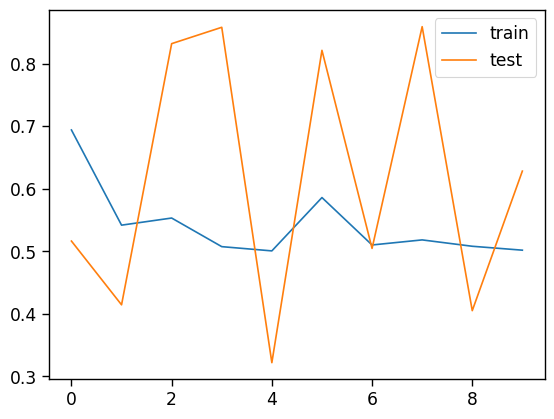

In [44]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

In [46]:
# Ensure the data types are compatible with TensorFlow
X_test = np.asarray(X_test).astype('float32')

# Predict the target variable on the test data
y_pred_proba = model.predict(X_test)
y_pred = np.round(y_pred_proba).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

253/253 [==============================] - 1s 2ms/step
Accuracy: 0.597132970835393

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.59      0.74      7919
           1       0.04      0.87      0.08       173

    accuracy                           0.60      8092
   macro avg       0.52      0.73      0.41      8092
weighted avg       0.97      0.60      0.73      8092


Confusion Matrix:
[[4681 3238]
 [  22  151]]
